In [15]:
%pip install -U scikit-learn scipy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 52.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 59.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


### Upgrade `yfinance` to avoid errors 

In [1]:
%pip install yfinance --upgrade --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 21.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: yfinance╺━━━━━━━━━━━━━━━━━━━ 2/4 [curl_cffi]
    Found existing installation: yfinance 0.2.54━━━━━━━━━━━━━━ 2/4 [curl_cffi]
    Uninstalling yfinance-0.2.54:╺━━━━━━━━━━━━━━━━━━━ 2/4 [curl_cffi]
      Successfully uninstalled yfinance-0.2.54━━━━━━━━━━━━━━━━ 2/4 [curl_cffi]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [yfinance]3/4 [yfinance]

[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import yfinance as yf
# Download Apple Ticker Data
data = yf.download('AAPL', start='2009-04-01', end='2010-01-01', interval='1d')



[*********************100%***********************]  1 of 1 completed


In [3]:
yf.__version__

'0.2.58'

In [7]:
data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2009-04-01,3.270873,3.280202,3.126424,3.132442,589372000
2009-04-02,3.391849,3.453240,3.303675,3.314508,812366800
2009-04-03,3.490556,3.494770,3.416226,3.436388,636241200
2009-04-06,3.564587,3.573615,3.409002,3.458958,658064400
2009-04-07,3.460764,3.511020,3.436388,3.506807,536580800
...,...,...,...,...,...
2009-12-24,6.290765,6.300094,6.119532,6.125551,500889200
2009-12-28,6.368106,6.438525,6.307919,6.371417,644565600


In [8]:
# Flatten the MultiIndex columns (keep only the first level)
data.columns = data.columns.get_level_values(0)  # 'Date', 'Close', 'High', etc.

# Reset index to make 'Date' a column (if it's currently the index)
data = data.reset_index()

# Select only the needed columns
data = data[['Date', 'Close', 'High', 'Low', 'Open', 'Volume']]

# Verify the cleaned structure
print(data.head())
print(data.columns)  # Should now show: Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

Price       Date     Close      High       Low      Open     Volume
0     2009-04-01  3.270873  3.280202  3.126424  3.132442  589372000
1     2009-04-02  3.391849  3.453240  3.303675  3.314508  812366800
2     2009-04-03  3.490556  3.494770  3.416226  3.436388  636241200
3     2009-04-06  3.564587  3.573615  3.409002  3.458958  658064400
4     2009-04-07  3.460764  3.511020  3.436388  3.506807  536580800
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


### Simulate missing data

In [9]:
print(len(data.index))
for i in range(4, len(data.index), int(len(data.index)/10)):
    data.iloc[i] = np.nan
data.to_csv('AAPL_2009-2010_6m_RAW_1d.csv')

191


In [10]:
data

Price,Date,Close,High,Low,Open,Volume
0,2009-04-01,3.270873,3.280202,3.126424,3.132442,589372000.0
1,2009-04-02,3.391849,3.453240,3.303675,3.314508,812366800.0
2,2009-04-03,3.490556,3.494770,3.416226,3.436388,636241200.0
3,2009-04-06,3.564587,3.573615,3.409002,3.458958,658064400.0
4,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
186,2009-12-24,6.290765,6.300094,6.119532,6.125551,500889200.0
187,2009-12-28,6.368106,6.438525,6.307919,6.371417,644565600.0
188,2009-12-29,6.292570,6.401509,6.281436,6.398801,445205600.0
189,2009-12-30,6.369009,6.379843,6.268797,6.284446,412084400.0


# 1. Libraries & Sample Data
The first step is to load our Python Libraries and download the sample data.
The dataset represents Apple stock price (1d bars) for the year 2010

In [16]:
# Load Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from IPython.display import display, HTML
# for dataframe display
pd.set_option("display.max_rows", None)
def display_df(df):
    # Puts the scrollbar next to the DataFrame
    display(HTML("<div style='height: 200px; overflow: auto; width: fit-content'>" + df.to_html() + "</div>"))

In [ ]:
# Read Sample Data
data = pd.read_csv('AAPL_2009-2010_6m_RAW_1d.csv')

In [18]:
data

,Unnamed: 0,Date,Close,High,Low,Open,Volume
0,0,2009-04-01,3.270873,3.280202,3.126424,3.132442,5.893720e+08
1,1,2009-04-02,3.391849,3.453240,3.303675,3.314508,8.123668e+08
2,2,2009-04-03,3.490556,3.494770,3.416226,3.436388,6.362412e+08
3,3,2009-04-06,3.564587,3.573615,3.409002,3.458958,6.580644e+08
4,4,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2009-04-08,3.500488,3.514632,3.448125,3.473705,4.556300e+08
6,6,2009-04-09,3.598292,3.611232,3.549841,3.563685,5.307568e+08
7,7,2009-04-13,3.617851,3.640722,3.581137,3.611531,3.892364e+08
8,8,2009-04-14,3.560373,3.616348,3.528474,3.598291,4.546220e+08
9,9,2009-04-15,3.540211,3.558568,3.483635,3.526970,4.128824e+08


In [19]:
# draop column 
data = data.drop('Unnamed: 0', axis = 1 )
data.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

# 2. Exploratory Data Analysis
Next, we want to analyze our data. Display the data as a dataframe, and plot some relevant data so you can get an idea of what our dataset looks like.

In [20]:
# Display as Dataframe
display_df(data)

,Date,Close,High,Low,Open,Volume
0,2009-04-01,3.270873,3.280202,3.126424,3.132442,5.893720e+08
1,2009-04-02,3.391849,3.453240,3.303675,3.314508,8.123668e+08
2,2009-04-03,3.490556,3.494770,3.416226,3.436388,6.362412e+08
3,2009-04-06,3.564587,3.573615,3.409002,3.458958,6.580644e+08
4,NaN,NaN,NaN,NaN,NaN,NaN
5,2009-04-08,3.500488,3.514632,3.448125,3.473705,4.556300e+08
6,2009-04-09,3.598292,3.611232,3.549841,3.563685,5.307568e+08
7,2009-04-13,3.617851,3.640722,3.581137,3.611531,3.892364e+08
8,2009-04-14,3.560373,3.616348,3.528474,3.598291,4.546220e+08
9,2009-04-15,3.540211,3.558568,3.483635,3.526970,4.128824e+08


In [21]:
#Index data by Date
data.set_index('Date', inplace=True)
display_df(data)

,Close,High,Low,Open,Volume
Date,,,,,
2009-04-01,3.270873,3.280202,3.126424,3.132442,5.893720e+08
2009-04-02,3.391849,3.453240,3.303675,3.314508,8.123668e+08
2009-04-03,3.490556,3.494770,3.416226,3.436388,6.362412e+08
2009-04-06,3.564587,3.573615,3.409002,3.458958,6.580644e+08
NaN,NaN,NaN,NaN,NaN,NaN
2009-04-08,3.500488,3.514632,3.448125,3.473705,4.556300e+08
2009-04-09,3.598292,3.611232,3.549841,3.563685,5.307568e+08
2009-04-13,3.617851,3.640722,3.581137,3.611531,3.892364e+08
2009-04-14,3.560373,3.616348,3.528474,3.598291,4.546220e+08


<Axes: xlabel='Date'>

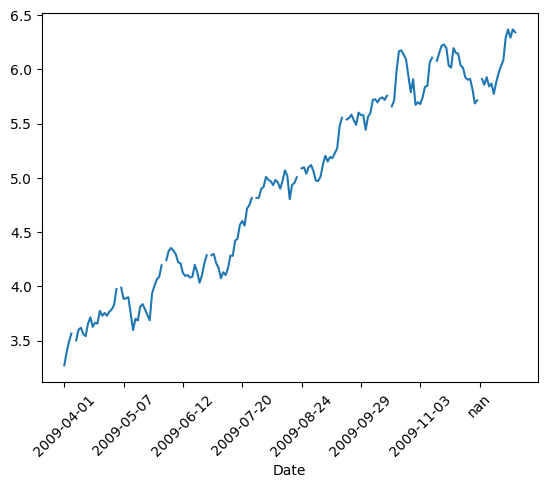

In [22]:
# Plot the Close Data
data['Close'].plot(rot = 45)

# 3. Data Cleaning
Next, we need to clean our data for training our model. This requires removal of NaN values.

In [23]:
# Check for null values
print('Number of Null Values =', data.isnull().sum())

Number of Null Values = Close     10
High      10
Low       10
Open      10
Volume    10
dtype: int64


In [24]:
# forward fill missing values
data=data.ffill()
display_df(data)

,Close,High,Low,Open,Volume
Date,,,,,
2009-04-01,3.270873,3.280202,3.126424,3.132442,5.893720e+08
2009-04-02,3.391849,3.453240,3.303675,3.314508,8.123668e+08
2009-04-03,3.490556,3.494770,3.416226,3.436388,6.362412e+08
2009-04-06,3.564587,3.573615,3.409002,3.458958,6.580644e+08
NaN,3.564587,3.573615,3.409002,3.458958,6.580644e+08
2009-04-08,3.500488,3.514632,3.448125,3.473705,4.556300e+08
2009-04-09,3.598292,3.611232,3.549841,3.563685,5.307568e+08
2009-04-13,3.617851,3.640722,3.581137,3.611531,3.892364e+08
2009-04-14,3.560373,3.616348,3.528474,3.598291,4.546220e+08


In [25]:
# Check for null values
print('Number of Null Values =', data.isnull().sum())

Number of Null Values = Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


# 4. Feature Definition
Now that we have cleaned our stock data, we can define some financial indicaors, or "features" to train our model on. We will be calculating some popular indicators: 20-day Close Moving Average, 5-day Close Moving Average, 20-day Close Bollinger Bands, and 20-day Historical Volatility of Close Price. 

In [26]:
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()
data['STD20'] = data['Close'].rolling(window=20).std()
data['BB_upper'] = data['MA20'] + (data['STD20'] * 2)
data['BB_lower'] = data['MA20'] - (data['STD20'] * 2)
data['Log_Ret'] = np.log(data['Close'] / data['Close'].shift(1))
data['Vol20'] = data['Log_Ret'].rolling(window=20).std() * np.sqrt(252)
display_df(data)

,Close,High,Low,Open,Volume,MA5,MA20,STD20,BB_upper,BB_lower,Log_Ret,Vol20
Date,,,,,,,,,,,,
2009-04-01,3.270873,3.280202,3.126424,3.132442,5.893720e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-02,3.391849,3.453240,3.303675,3.314508,8.123668e+08,NaN,NaN,NaN,NaN,NaN,0.036318,NaN
2009-04-03,3.490556,3.494770,3.416226,3.436388,6.362412e+08,NaN,NaN,NaN,NaN,NaN,0.028686,NaN
2009-04-06,3.564587,3.573615,3.409002,3.458958,6.580644e+08,NaN,NaN,NaN,NaN,NaN,0.020987,NaN
NaN,3.564587,3.573615,3.409002,3.458958,6.580644e+08,3.456490,NaN,NaN,NaN,NaN,0.000000,NaN
2009-04-08,3.500488,3.514632,3.448125,3.473705,4.556300e+08,3.502413,NaN,NaN,NaN,NaN,-0.018146,NaN
2009-04-09,3.598292,3.611232,3.549841,3.563685,5.307568e+08,3.543702,NaN,NaN,NaN,NaN,0.027557,NaN
2009-04-13,3.617851,3.640722,3.581137,3.611531,3.892364e+08,3.569161,NaN,NaN,NaN,NaN,0.005421,NaN
2009-04-14,3.560373,3.616348,3.528474,3.598291,4.546220e+08,3.568318,NaN,NaN,NaN,NaN,-0.016015,NaN


In [27]:
# Remove rows with MA=NaN
data = data.dropna(axis=0)
display_df(data)

,Close,High,Low,Open,Volume,MA5,MA20,STD20,BB_upper,BB_lower,Log_Ret,Vol20
Date,,,,,,,,,,,,
2009-04-30,3.786679,3.821888,3.759294,3.798415,4.984896e+08,3.752672,3.634103,0.108387,3.850877,3.417329,0.005499,0.287544
2009-05-01,3.829110,3.850476,3.785775,3.785775,3.975160e+08,3.772775,3.655966,0.100783,3.857532,3.454400,0.011143,0.267027
2009-05-04,3.974461,3.979877,3.842350,3.859202,6.093584e+08,3.816952,3.680161,0.115931,3.912022,3.448300,0.037257,0.278159
NaN,3.974461,3.979877,3.842350,3.859202,6.093584e+08,3.866125,3.700655,0.129820,3.960296,3.441014,0.000000,0.273591
2009-05-06,3.987403,4.017497,3.918789,4.012381,4.735388e+08,3.910423,3.721796,0.140485,4.002766,3.440826,0.003251,0.272976
2009-05-07,3.883880,3.984092,3.848971,3.982286,5.317760e+08,3.929863,3.740965,0.134737,4.010440,3.471491,-0.026305,0.283718
2009-05-08,3.887793,3.949184,3.799619,3.883278,4.679640e+08,3.941600,3.755440,0.134153,4.023746,3.487135,0.001007,0.271348
2009-05-11,3.899230,3.941060,3.825500,3.833024,4.046588e+08,3.926553,3.769509,0.133717,4.036944,3.502074,0.002937,0.271303
2009-05-12,3.744246,3.903441,3.709037,3.898927,6.094816e+08,3.880510,3.778703,0.124591,4.027886,3.529520,-0.040559,0.306692


<Axes: xlabel='Date'>

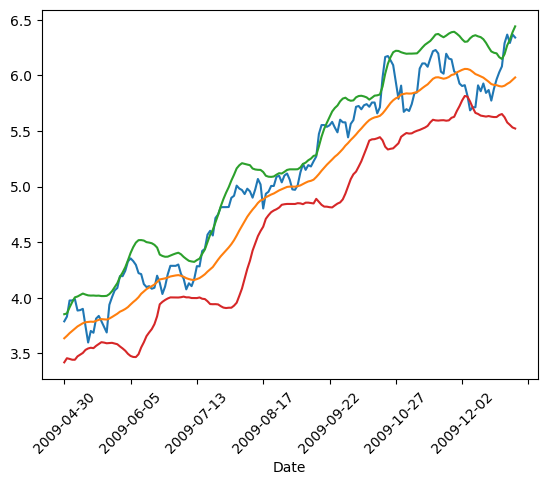

In [28]:
# Plot Features: Close, MA20, BB Upper, BB Lower
data['Close'].plot()
data['MA20'].plot()
data['BB_upper'].plot()
data['BB_lower'].plot(rot = 45)

<Axes: xlabel='Date'>

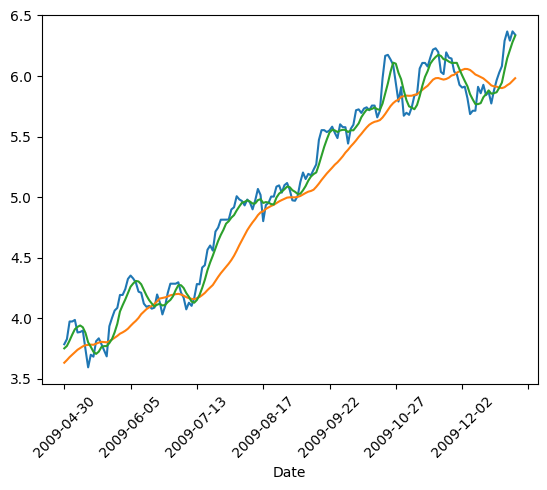

In [29]:
# Plot Features: Close, MA20, MA5
data['Close'].plot()
data['MA20'].plot()
data['MA5'].plot(rot = 45)

<Axes: xlabel='Date'>

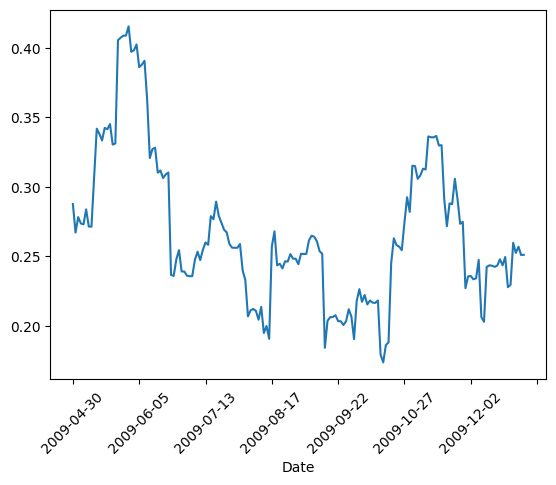

In [30]:
# Plot Features: Volatility
data['Vol20'].plot(rot = 45)

In [31]:
data.to_csv('AAPL_2009-2010_6m_all_features_1d.csv')